File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
Skipping Naive Bayes for Web Attack.csv due to insufficient class diversity. Classes in train: [1], Classes in test: [1]
Skipping Naive Bayes for Web Attack.csv due to insufficient class diversity. Classes in train: [1], Classes in test: [1]
Skipping Naive Bayes for Web Attack.csv due to insufficient class diversity. Classes in train: [1], Classes in test: [1]
Skipping Naive Bayes for Web Attack.csv due to insufficient class diversity. Classes in train: [1], Classes in test: [1]
Skipping Naive Bayes for Web Attack.csv due to insufficient class diversity. Classes in train: [1], Classes in test: [1]
Skipping Naive Bayes for Web Attack.csv due to insufficient class diversity. Classes in train: [1], Classes in test: [1]
Skipping Naive Bayes for Web Attack.csv due to insufficient class diversity. Classes in train: [1], Classes in test: [1]
Skipping Naive Bayes for Web Attack.

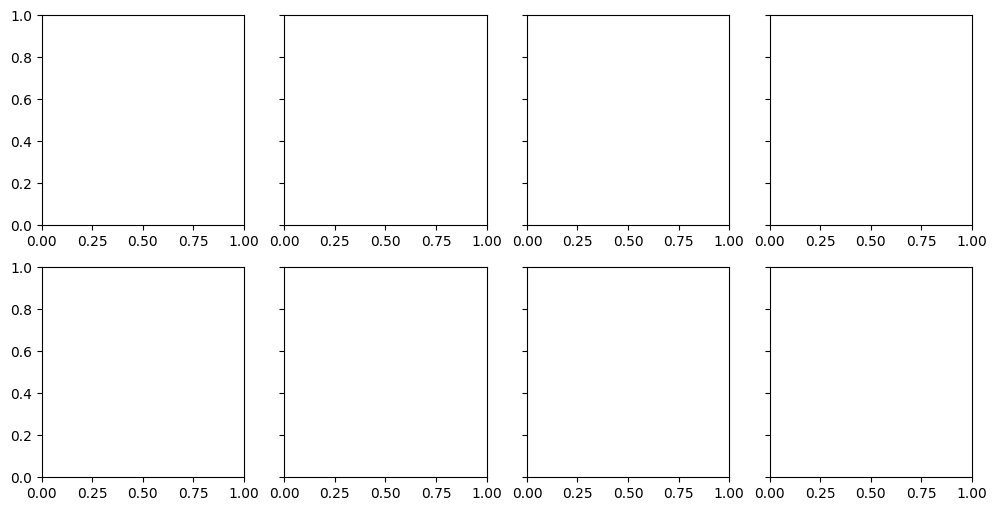


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
SSH-Patator       Naive Bayes        0.43            0.68            0.58            0.4             0.0072         
SSH-Patator       QDA                0.5             0.69            0.63            0.49            0.0069         
SSH-Patator       Random Forest      0.96            0.95            0.97            0.96            0.0193         
SSH-Patator       ID3                0.96            0.95            0.97            0.96            0.0092         


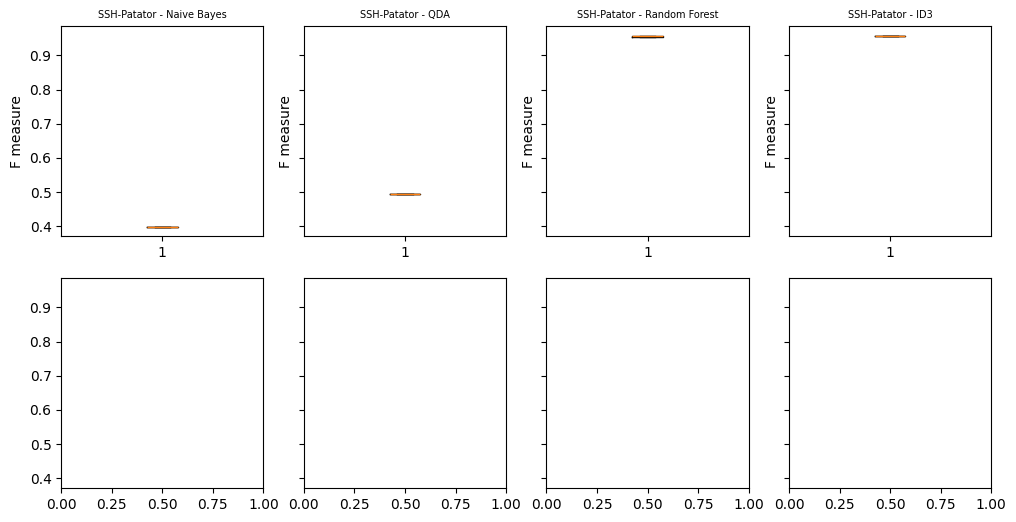


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
DoS Slowhttptest  Naive Bayes        0.41            0.61            0.56            0.4             0.0067         
DoS Slowhttptest  QDA                0.44            0.63            0.58            0.43            0.0067         
DoS Slowhttptest  Random Forest      0.99            0.99            0.98            0.98            0.0179         
DoS Slowhttptest  ID3                0.98            0.98            0.97            0.98            0.0082         


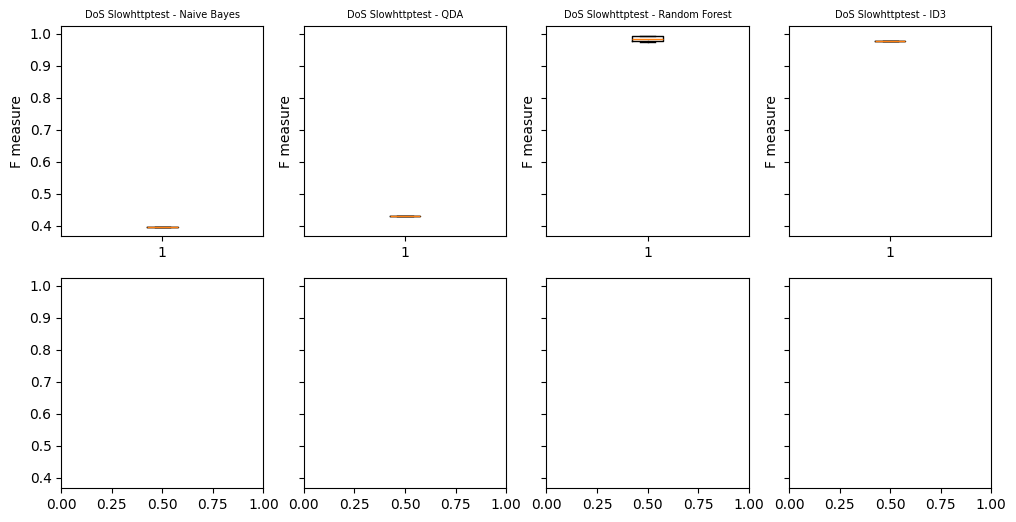


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
Skipping Naive Bayes for Infiltration.csv due to insufficient samples in one or more classes.
Skipping Naive Bayes for Infiltration.csv due to insufficient samples in one or more classes.
Skipping Naive Bayes for Infiltration.csv due to insufficient samples in one or more classes.
Skipping Naive Bayes for Infiltration.csv due to insufficient samples in one or more classes.
Skipping Naive Bayes for Infiltration.csv due to insufficient samples in one or more classes.
Skipping Naive Bayes for Infiltration.csv due to insufficient samples in one or more classes.
Skipping Naive Bayes for Infiltration.csv due to insufficient samples in one or more classes.
Skipping Naive Bayes for Infiltration.csv due to insufficient samples in one or more classes.
Skipping Naive Bayes for 

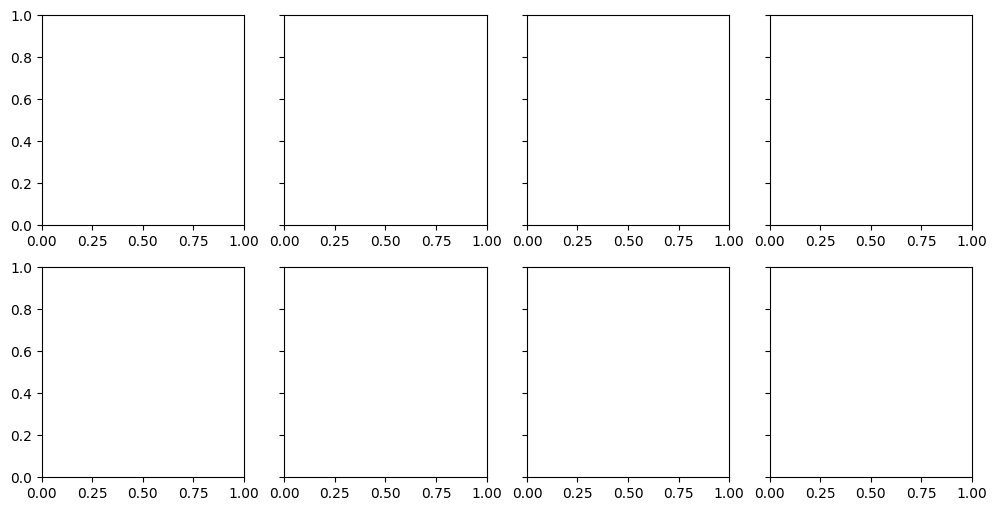


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
DoS Hulk          Naive Bayes        0.35            0.65            0.54            0.31            0.0439         
DoS Hulk          QDA                0.42            0.67            0.59            0.4             0.055          
DoS Hulk          Random Forest      0.94            0.94            0.91            0.92            0.2808         
DoS Hulk          ID3                0.96            0.94            0.95            0.95            0.1254         


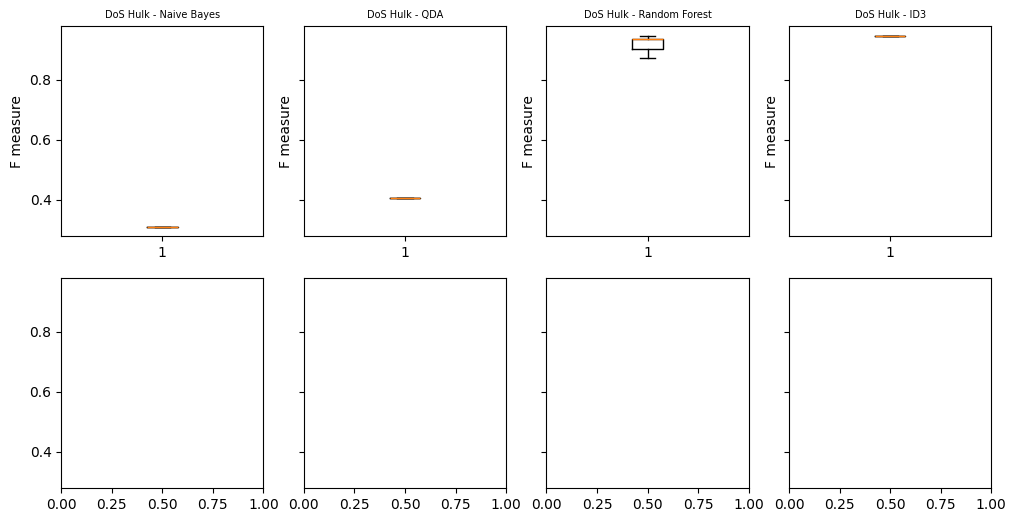


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
PortScan          Naive Bayes        0.45            0.67            0.6             0.43            0.032          
PortScan          QDA                0.85            0.83            0.89            0.84            0.0256         
PortScan          Random Forest      1.0             1.0             1.0             1.0             0.2369         
PortScan          ID3                1.0             1.0             1.0             1.0             0.1031         


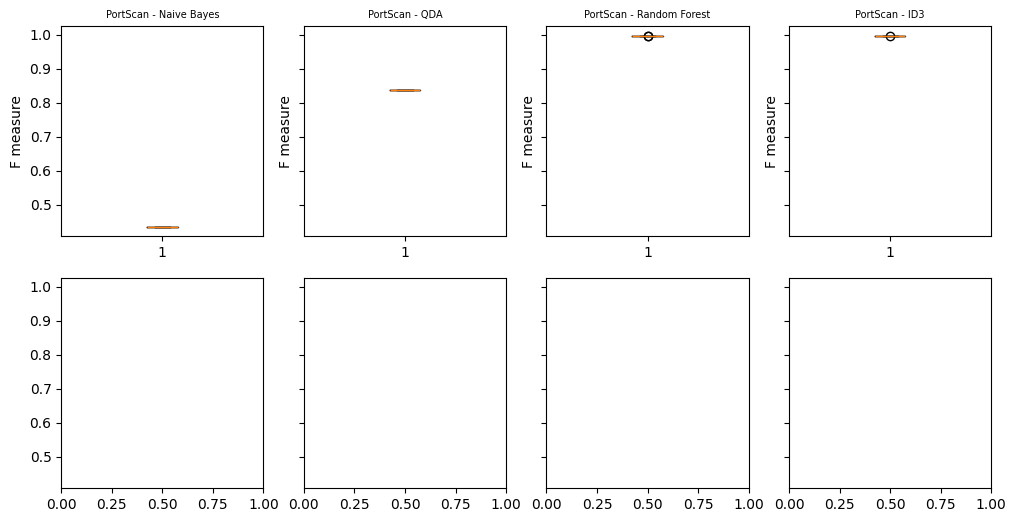


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
Bot               Naive Bayes        0.54            0.69            0.67            0.53            0.0067         
Bot               QDA                0.69            0.74            0.78            0.69            0.0062         
Bot               Random Forest      0.96            0.95            0.96            0.96            0.0147         
Bot               ID3                0.94            0.92            0.96            0.94            0.0067         


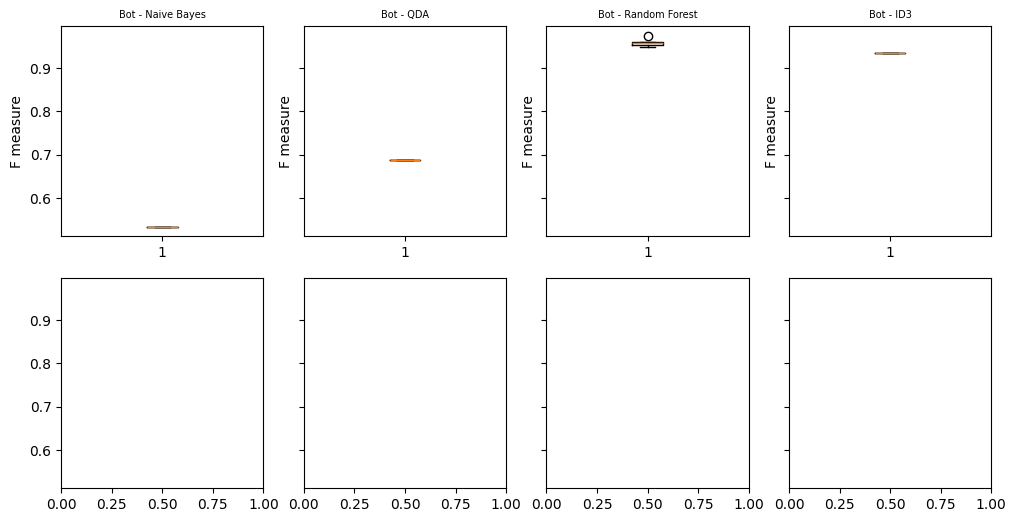


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
DoS slowloris     Naive Bayes        0.45            0.69            0.59            0.43            0.0069         
DoS slowloris     QDA                0.52            0.69            0.64            0.51            0.0067         
DoS slowloris     Random Forest      0.94            0.94            0.93            0.93            0.018          
DoS slowloris     ID3                0.95            0.96            0.93            0.94            0.0084         


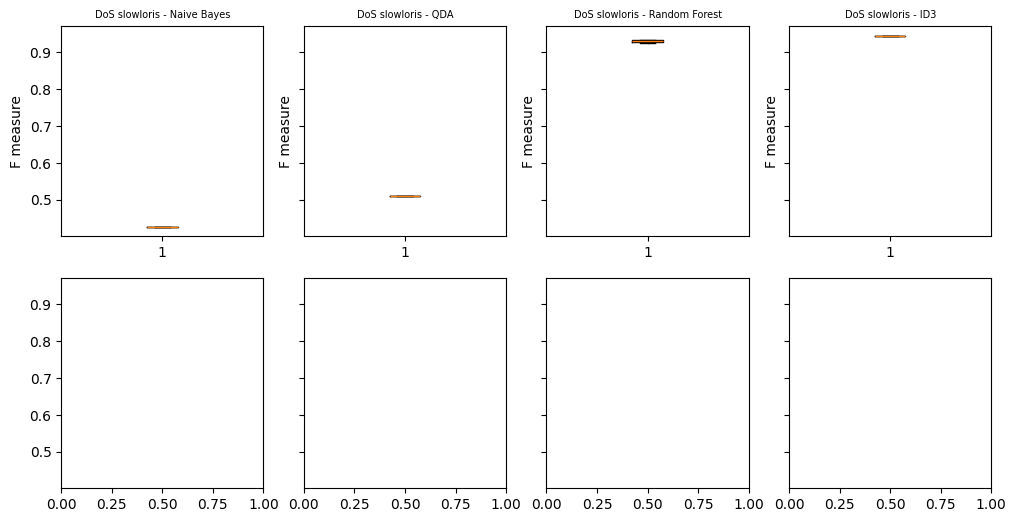


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
DDoS              Naive Bayes        0.77            0.74            0.69            0.71            0.0095         
DDoS              QDA                0.45            0.68            0.6             0.43            0.0124         
DDoS              Random Forest      0.96            0.95            0.97            0.96            0.0633         
DDoS              ID3                0.96            0.95            0.97            0.96            0.0331         


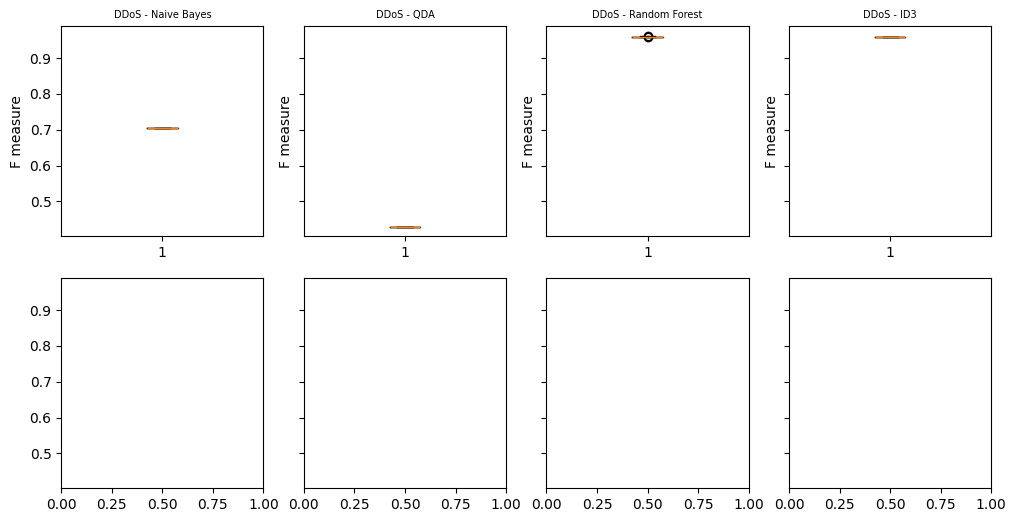


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
Skipping Naive Bayes for Heartbleed.csv due to insufficient samples in one or more classes.
Skipping Naive Bayes for Heartbleed.csv due to insufficient samples in one or more classes.
Skipping Naive Bayes for Heartbleed.csv due to insufficient samples in one or more classes.
Skipping Naive Bayes for Heartbleed.csv due to insufficient samples in one or more classes.
Skipping Naive Bayes for Heartbleed.csv due to insufficient samples in one or more classes.
Skipping Naive Bayes for Heartbleed.csv due to insufficient samples in one or more classes.
Skipping Naive Bayes for Heartbleed.csv due to insufficient samples in one or more classes.
Skipping Naive Bayes for Heartbleed.csv due to insufficient samples in one or more classes.
Skipping Naive Bayes for Heartbleed.csv d

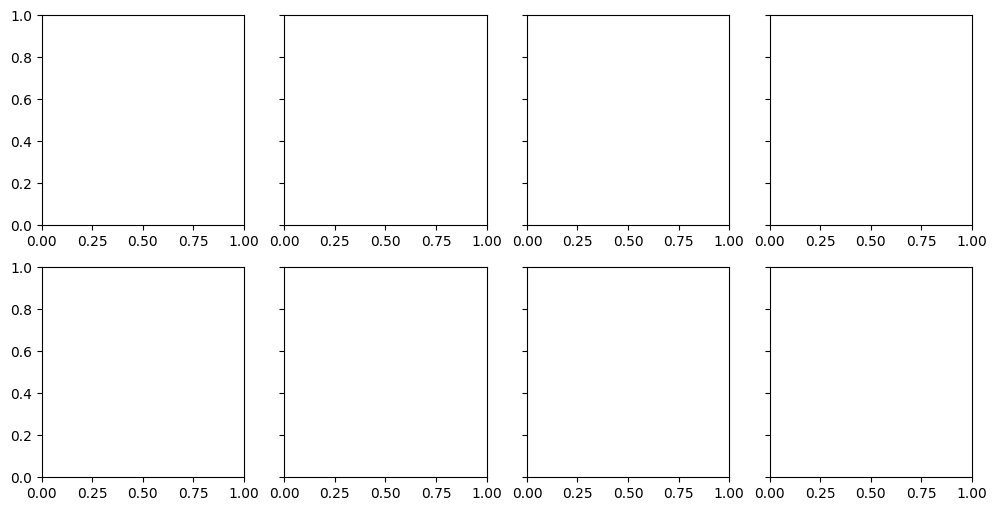


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
FTP-Patator       Naive Bayes        0.99            0.99            0.99            0.99            0.0068         
FTP-Patator       QDA                1.0             1.0             1.0             1.0             0.0068         
FTP-Patator       Random Forest      1.0             1.0             1.0             1.0             0.0176         
FTP-Patator       ID3                1.0             1.0             1.0             1.0             0.0077         


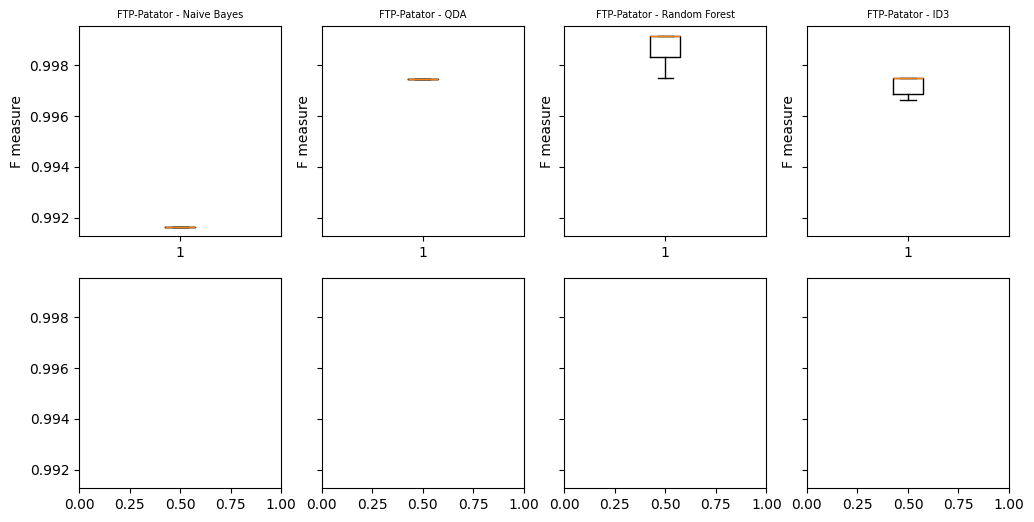


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
DoS GoldenEye     Naive Bayes        0.83            0.83            0.75            0.78            0.0072         
DoS GoldenEye     QDA                0.94            0.93            0.93            0.93            0.0072         
DoS GoldenEye     Random Forest      0.99            0.99            0.99            0.99            0.0236         
DoS GoldenEye     ID3                0.99            0.99            0.99            0.99            0.0111         


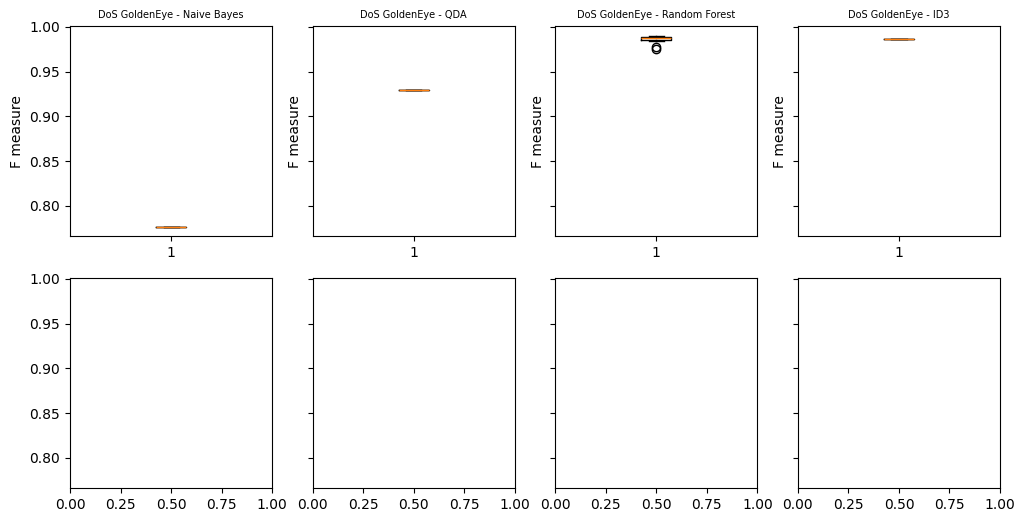


------------------------------------------------------------------------------------------------------


mission accomplished!
Total operation time: =  19.44304919242859 seconds


In [7]:
##  "all_data.csv" file is required for the operation of the program.
##  "all_data.csv" file must be located in the same directory as the program.

##  the purpose of this program is to apply machine learning algorithms to the dataset and observe the performance of algorithms.
##  the algorithms used are:Naive Bayes, QDA, Random Forest, ID3, AdaBoost, MLP, Nearest Neighbors
##  As the program display output data include: file name, machine learning algorithm name, accuracy,Precision, Recall, F1-score,Time
##  the program will create a CSV file that prints the results and a folder containing graphics.

##  the some codes parts used for calculation and graphing are taken from the following site.
##  http://scikit-learn.org


# from sklearn import metrics
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
# from sklearn.metrics import average_precision_score
# from sklearn.metrics import confusion_matrix
# from sklearn.model_selection import train_test_split
# from sklearn.naive_bayes import GaussianNB
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.neural_network import MLPClassifier
# from sklearn.tree import DecisionTreeClassifier

# from sklearn.metrics import f1_score
# from sklearn.metrics import recall_score
# from sklearn.metrics import precision_score


# import matplotlib.pyplot as plt
# import numpy as np
# %matplotlib inline
# import os
# import pandas as pd
# import csv
# import time
# import warnings
# import math
# warnings.filterwarnings("ignore")


# result="./results/results_1.csv" #a CSV file is named in which the results are saved.
# csv_files=os.listdir("attacks")# CSV files names: #The names of the files in the attacks folder are taken and assigned to a list (csv_files).
# path=".\\attacks\\"
# repetition=10


# def folder(f_name): #this function creates a folder named "results" and "result_graph_1" in the program directory.
#     try:
#         if not os.path.exists(f_name):
#             os.makedirs(f_name)
#     except OSError:
#         print ("The folder could not be created!")

# folder_name="./results/"
# folder(folder_name)
# folder_name="./results/result_graph_1/"
# folder(folder_name)


# #The machine learning algorithms to be used are defined in a dictionary (ml_list).
# ml_list={
# "Naive Bayes":GaussianNB(),
# "QDA":QDA(),
# "Random Forest":RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
# "ID3" :DecisionTreeClassifier(max_depth=5,criterion="entropy"),
# "AdaBoost":AdaBoostClassifier(),
# "MLP":MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500),
# "Nearest Neighbors":KNeighborsClassifier(3)}



# # the features to be used for each attack type is defined in a dictionary(features).
# # the first 4 of the features created by the file "04_1_feature_selection_for_attack_files.py" are used here.
# features={"Bot":["Bwd Packet Length Mean","Flow IAT Max","Flow Duration","Flow IAT Min","Label"],
# "DDoS":["Bwd Packet Length Std","Total Backward Packets","Fwd IAT Total","Flow Duration","Label"],
# "DoS GoldenEye":["Flow IAT Max","Bwd Packet Length Std","Flow IAT Min","Total Backward Packets","Label"],
# "DoS Hulk":["Bwd Packet Length Std","Fwd Packet Length Std","Fwd Packet Length Max","Flow IAT Min","Label"],
# "DoS Slowhttptest":["Flow IAT Mean","Fwd Packet Length Min","Bwd Packet Length Mean","Total Length of Bwd Packets","Label"],
# "DoS slowloris":["Flow IAT Mean","Total Length of Bwd Packets","Bwd Packet Length Mean","Total Fwd Packets","Label"],
# "FTP-Patator":["Fwd Packet Length Max","Fwd Packet Length Std","Fwd Packet Length Mean","Bwd Packet Length Std","Label"],
# "Heartbleed":["Total Backward Packets","Fwd Packet Length Max","Flow IAT Min","Bwd Packet Length Max","Label"],
# "Infiltration":["Fwd Packet Length Max","Fwd Packet Length Mean","Flow Duration","Total Length of Fwd Packets","Label"],
# "PortScan":["Flow Bytes/s","Total Length of Fwd Packets","Fwd IAT Total","Flow Duration","Label"],
# "SSH-Patator":["Fwd Packet Length Max","Flow Duration","Flow IAT Max","Total Length of Fwd Packets","Label"],
# "Web Attack":["Bwd Packet Length Std","Total Length of Fwd Packets","Flow Bytes/s","Flow IAT Max","Label"]}

# seconds=time.time()#time stamp for all processing time



# with open(result, "w", newline="",encoding="utf-8") as f:#a CSV file is created to save the results obtained.
#     wrt = csv.writer(f)
#     wrt.writerow(["File","ML algorithm","accuracy","Precision", "Recall" , "F1-score","Time"])




# for j in csv_files: #this loop runs on the list containing the filenames.Operations are repeated for all attack files
#     print ('%-17s %-17s  %-15s %-15s %-15s %-15s %-15s' % ("File","ML algorithm","accuracy","Precision", "Recall" , "F1-score","Time"))# print output header
#     a=[]
    
#     feature_list=list(features[j[0:-4]])
#     df=pd.read_csv(path+j,usecols=feature_list)#read an attack file.
#     df=df.fillna(0)
#     attack_or_not=[]
#     for i in df["Label"]: #it changes the normal label to "1" and the attack tag to "0" for use in the machine learning algorithm
        
#         if i =="BENIGN":
#             attack_or_not.append(1)
#         else:
#             attack_or_not.append(0)           
#     df["Label"]=attack_or_not

    
#     y = df["Label"] #this section separates the label and the data into two separate pieces, as Label=y Data=X 
#     del df["Label"]
#     feature_list.remove('Label')
#     X = df[feature_list]

    
#     for ii in ml_list: #this loop runs on the list containing the machine learning algorithm names. Operations are repeated for all the 7 algorithm
#         precision=[]
#         recall=[]
#         f1=[]
#         accuracy=[]
#         t_time=[]
#         for i in range(repetition): # This loop allows cross-validation and machine learning algorithm to be repeated 10 times
#             second=time.time()#time stamp for processing time

#             # cross-validation
#             X_train, X_test, y_train, y_test = train_test_split(X, y,#  data (X) and labels (y) are divided into 2 parts to be sent to the machine learning algorithm (80% train,%20 test). 
#                 test_size = 0.20, random_state = repetition)#  So, in total there are 4 tracks: training data(X_train), training tag (y_train), test data(X_test) and test tag(y_test).


#             #machine learning algorithm is applied in this section
#             clf = ml_list[ii]#choose algorithm from ml_list dictionary                                                                          
#             clf.fit(X_train, y_train)
#             predict =clf.predict(X_test)
        
#             #makes "classification report" and assigns the precision, f-measure, and recall values.s.    
                  
#             f_1=f1_score(y_test, predict, average='macro')
#             pr=precision_score(y_test, predict, average='macro')
#             rc=recall_score(y_test, predict, average='macro')

            
            
            
            
#             precision.append(float(pr))
#             recall.append(float(rc))
#             f1.append(float(f_1))
#             accuracy.append(clf.score(X_test, y_test))
#             t_time.append(float((time.time()-second)) )


            
#         print ('%-17s %-17s  %-15s %-15s %-15s %-15s %-15s' % (j[0:-4],ii,str(round(np.mean(accuracy),2)),str(round(np.mean(precision),2)), 
#             str(round(np.mean(recall),2)),str(round(np.mean(f1),2)),str(round(np.mean(t_time),4))))#the result of the ten repetitions is printed on the screen.

#         with open(result, "a", newline="",encoding="utf-8") as f: # all the values found are saved in the opened file.
#             wrt = csv.writer(f)
#             for i in range(0,len(t_time)):
#                 wrt.writerow([j[0:-4],ii,accuracy[i],precision[i],recall[i],f1[i],t_time[i]])#file name, algorithm name, precision, recall and f-measure are writed in CSV file
#         a.append(f1)


#      # In this section, Box graphics are created for the results of machine learning algorithms and saved in the feaure_graph folder.

     
#     ml=["Naive Bayes","QDA","Random Forest","ID3","AdaBoost","MLP","Nearest Neighbors"]
#     temp=0
#     fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 6), sharey=True)
#     for c in range(2):
#         for b in range(4):
#             axes[c, b].boxplot(a[temp] )
#             axes[c, b].set_title(str(j[0:-4])+" - "+str(ml[temp]),fontsize=7)
#             axes[c, b].set_ylabel(("F measure"))
#             temp+=1
#             if temp==7:
#                 break
#         if temp==7:
#             break
#     plt.savefig(folder_name+j[0:-4]+".pdf",bbox_inches='tight', papertype = 'a4', orientation = 'portrait', format = 'pdf')
#     plt.show()
#     print("\n------------------------------------------------------------------------------------------------------\n\n")
    
# print("mission accomplished!")
# print("Total operation time: = ",time.time()- seconds ,"seconds")

#/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

from sklearn import metrics
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import average_precision_score, confusion_matrix, f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import csv
import time
import warnings
import math
warnings.filterwarnings("ignore")

result = "./results/results_1.csv" # a CSV file is named in which the results are saved.
csv_files = os.listdir("./attacks/") # CSV files names: #The names of the files in the attacks folder are taken and assigned to a list (csv_files).
path = "./attacks/"
repetition = 10

def folder(f_name): # this function creates a folder named "results" and "result_graph_1" in the program directory.
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print("The folder could not be created!")

folder_name = "./results/"
folder(folder_name)
folder_name = "./results/result_graph_1/"
folder(folder_name)

# The machine learning algorithms to be used are defined in a dictionary (ml_list).
ml_list = {
    "Naive Bayes": GaussianNB(),
    "QDA": QDA(),
    "Random Forest": RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    "ID3": DecisionTreeClassifier(max_depth=5, criterion="entropy"),
    # "AdaBoost": AdaBoostClassifier(),
    # "MLP": MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500),
    # "Nearest Neighbors": KNeighborsClassifier(3)
}

# the features to be used for each attack type is defined in a dictionary(features).
# the first 4 of the features created by the file "04_1_feature_selection_for_attack_files.py" are used here.
features = {
    "Bot": ["Bwd Packet Length Mean", "Flow IAT Max", "Flow Duration", "Flow IAT Min", "Label"],
    "DDoS": ["Bwd Packet Length Std", "Total Backward Packets", "Fwd IAT Total", "Flow Duration", "Label"],
    "DoS GoldenEye": ["Flow IAT Max", "Bwd Packet Length Std", "Flow IAT Min", "Total Backward Packets", "Label"],
    "DoS Hulk": ["Bwd Packet Length Std", "Fwd Packet Length Std", "Fwd Packet Length Max", "Flow IAT Min", "Label"],
    "DoS Slowhttptest": ["Flow IAT Mean", "Fwd Packet Length Min", "Bwd Packet Length Mean", "Total Length of Bwd Packets", "Label"],
    "DoS slowloris": ["Flow IAT Mean", "Total Length of Bwd Packets", "Bwd Packet Length Mean", "Total Fwd Packets", "Label"],
    "FTP-Patator": ["Fwd Packet Length Max", "Fwd Packet Length Std", "Fwd Packet Length Mean", "Bwd Packet Length Std", "Label"],
    "Heartbleed": ["Total Backward Packets", "Fwd Packet Length Max", "Flow IAT Min", "Bwd Packet Length Max", "Label"],
    "Infiltration": ["Fwd Packet Length Max", "Fwd Packet Length Mean", "Flow Duration", "Total Length of Fwd Packets", "Label"],
    "PortScan": ["Flow Bytes/s", "Total Length of Fwd Packets", "Fwd IAT Total", "Flow Duration", "Label"],
    "SSH-Patator": ["Fwd Packet Length Max", "Flow Duration", "Flow IAT Max", "Total Length of Fwd Packets", "Label"],
    "Web Attack": ["Bwd Packet Length Std", "Total Length of Fwd Packets", "Flow Bytes/s", "Flow IAT Max", "Label"]
}

seconds = time.time() # time stamp for all processing time

with open(result, "w", newline="", encoding="utf-8") as f: # a CSV file is created to save the results obtained.
    wrt = csv.writer(f)
    wrt.writerow(["File", "ML algorithm", "accuracy", "Precision", "Recall", "F1-score", "Time"])

for j in csv_files: # this loop runs on the list containing the filenames. Operations are repeated for all attack files
    print('%-17s %-17s  %-15s %-15s %-15s %-15s %-15s' % ("File", "ML algorithm", "accuracy", "Precision", "Recall", "F1-score", "Time")) # print output header
    a = []
    
    feature_list = list(features[j[0:-4]])
    df = pd.read_csv(path + j, usecols = feature_list) # read an attack file.
    df = df.fillna(0)
    attack_or_not = []
    for i in df["Label"]: # it changes the normal label to "1" and the attack tag to "0" for use in the machine learning algorithm
        if i == "BENIGN":
            attack_or_not.append(1)
        else:
            attack_or_not.append(0)           
    df["Label"] = attack_or_not

    y = df["Label"] # this section separates the label and the data into two separate pieces, as Label=y Data=X 
    del df["Label"]
    feature_list.remove('Label')
    X = df[feature_list]

    for ii in ml_list: # this loop runs on the list containing the machine learning algorithm names. Operations are repeated for all the 7 algorithm
        precision = []
        recall = []
        f1 = []
        accuracy = []
        t_time = []
        for i in range(repetition): # This loop allows cross-validation and machine learning algorithm to be repeated 10 times
            second = time.time() # time stamp for processing time

            # cross-validation
            X_train, X_test, y_train, y_test = train_test_split(X, y, # data (X) and labels (y) are divided into 2 parts to be sent to the machine learning algorithm (80% train, 20% test). 
                test_size = 0.20, random_state = repetition) # So, in total there are 4 tracks: training data(X_train), training tag (y_train), test data(X_test) and test tag(y_test).

            # Check if there are at least 2 classes in y_train and y_test
            unique_train = np.unique(y_train)
            unique_test = np.unique(y_test)
            if len(unique_train) < 2 or len(unique_test) < 2:
                print(f"Skipping {ii} for {j} due to insufficient class diversity. Classes in train: {unique_train}, Classes in test: {unique_test}")
                continue

            # Check if any class has only one sample
            if any(np.sum(y_train == cls) < 2 for cls in unique_train) or any(np.sum(y_test == cls) < 2 for cls in unique_test):
                print(f"Skipping {ii} for {j} due to insufficient samples in one or more classes.")
                continue

            # machine learning algorithm is applied in this section
            clf = ml_list[ii] # choose algorithm from ml_list dictionary                                                                          
            clf.fit(X_train, y_train)
            predict = clf.predict(X_test)
        
            # makes "classification report" and assigns the precision, f-measure, and recall values.s.    
            f_1 = f1_score(y_test, predict, average='macro')
            pr = precision_score(y_test, predict, average='macro')
            rc = recall_score(y_test, predict, average='macro')

            precision.append(float(pr))
            recall.append(float(rc))
            f1.append(float(f_1))
            accuracy.append(clf.score(X_test, y_test))
            t_time.append(float((time.time() - second)))

        if precision:  # Check if precision is not empty before proceeding
            print('%-17s %-17s  %-15s %-15s %-15s %-15s %-15s' % (j[0:-4], ii, str(round(np.mean(accuracy), 2)), str(round(np.mean(precision), 2)), 
                str(round(np.mean(recall), 2)), str(round(np.mean(f1), 2)), str(round(np.mean(t_time), 4)))) # the result of the ten repetitions is printed on the screen

            with open(result, "a", newline="", encoding="utf-8") as f: # all the values found are saved in the opened file.
                wrt = csv.writer(f)
                for i in range(0, len(t_time)):
                    wrt.writerow([j[0:-4], ii, accuracy[i], precision[i], recall[i], f1[i], t_time[i]]) # file name, algorithm name, precision, recall and f-measure are written in CSV file
            a.append(f1)

    # In this section, Box graphics are created for the results of machine learning algorithms and saved in the feature_graph folder.
    # ml = ["Naive Bayes", "QDA", "Random Forest", "ID3", "AdaBoost", "MLP", "Nearest Neighbors"]
    ml = ["Naive Bayes", "QDA", "Random Forest", "ID3"]
    temp = 0
    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 6), sharey=True)
    for c in range(2):
        for b in range(4):
            if temp >= len(a): # check if temp is within bounds
                break
            axes[c, b].boxplot(a[temp])
            axes[c, b].set_title(str(j[0:-4]) + " - " + str(ml[temp]), fontsize=7)
            axes[c, b].set_ylabel(("F measure"))
            temp += 1
            if temp == 4:
                break
        if temp == 4:
            break
    plt.savefig(folder_name + j[0:-4] + ".pdf", bbox_inches='tight', format = 'pdf')
    plt.show()
    print("\n------------------------------------------------------------------------------------------------------\n\n")

print("mission accomplished!")
print("Total operation time: = ", time.time()- seconds ,"seconds")



